In [1]:
import sys
sys.path.append('../')
import env

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
READ_FILE = 'next_move_area'

In [4]:
csv_array = {}
def main(args, array):
    for _area in env.AREA_LIST():
        contour_area = env.area_to_contour(_area)
        df = pd.read_csv(env.get_full_path(READ_FILE, args, any=_area))
        array[args.dir][args.ratio][args.seed][args.csv][contour_area] = df.copy()
    
env.for_default_init(main, csv_array)

In [5]:
target1 = 'mobile'
target2 = 'od'

_dir = 'p30000'
_ratio = 'r6'
_seed = 's123'
_area = '440'

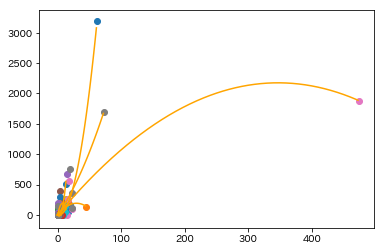

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LR

df = csv_array[_dir][_ratio][_seed].copy()
for _area in env.AREA_LIST_CONTOUR():
    try:
        trainX = df[target1][_area]['people'].values.reshape(-1, 1)
        trainY = df[target2][_area]['people'].values.reshape(-1, 1)

        quadratic = PolynomialFeatures(degree = 2)
        X_quad = quadratic.fit_transform(trainX)
        X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
        model = LR()

        # 2次の項を追加、予測値、R^2を評価
        mod_quad = model.fit(X_quad, trainY)
        y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
        r2_quad = model.score(X_quad, trainY)

        # plt.figure(dpi=600)
        plt.scatter(trainX, trainY)
        plt.plot(X_fit, y_quad_fit, 'orange')
#         print(_area+': ', r2_quad)

        # plt.savefig('correlation_{0}.png'.format(_dir+_ratio+_seed))
    except:
#         print(_area+': ', 'エラー')
        hoge=0


 p10000 r4 s123

 p10000 r5 s123

 p10000 r6 s123

 p20000 r4 s123

 p20000 r5 s123

 p20000 r6 s123

 p30000 r4 s123

 p30000 r5 s123

 p30000 r6 s123


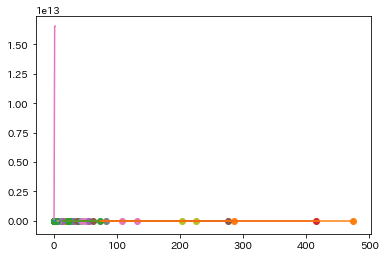

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LR

for _dir in env.DIR_LIST():
    for _ratio in env.RATIO_LIST():
        for _seed in env.SEED_LIST():
            df = csv_array[_dir][_ratio][_seed].copy()
            print('\n', _dir, _ratio, _seed)
            
            for _area in env.AREA_LIST_CONTOUR():
                try:
                    trainX = df[target1][_area]['people'].values.reshape(-1, 1)
                    trainY = df[target2][_area]['people'].values.reshape(-1, 1)

                    quadratic = PolynomialFeatures(degree = 2)
                    X_quad = quadratic.fit_transform(trainX)
                    X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
                    model = LR()

                    # 2次の項を追加、予測値、R^2を評価
                    mod_quad = model.fit(X_quad, trainY)
                    y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
                    r2_quad = model.score(X_quad, trainY)

                    # plt.figure(dpi=600)
#                     plt.xlim([0, 400])
#                     plt.ylim([0, 2000])
                    plt.scatter(trainX, trainY)
                    plt.plot(X_fit, y_quad_fit)
#                     print(_area+': ', r2_quad)

                    # plt.savefig('correlation_{0}.png'.format(_dir+_ratio+_seed))
                except:
#                     print(_area+': ', 'エラー')
                        hoge=0